        #-----------------------traffic sign classification Refactoring--------------------------# 

In [1]:
# Fundamental classes
import numpy as np  
import pandas as pd 
import tensorflow as tf
import os 

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Image related
from PIL import Image

# For Draw Images for Accuracy / Lose => plotting
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical # Convert to One Hot Vector
from tensorflow.keras.models import Sequential , load_model # sequential => new Model , load_model = > to load a trained model
from sklearn.model_selection import train_test_split # TO SPLIT DATA 

# Conv2D => filter images , MaxPool => Decrease size , Dense = > Fully Connected Layer , Flatten => Convert img to vector
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score


#------------------------------------------------ Prepare0 Data -------------------------------------------------#

In [2]:
#  Convert Images and labels (0 - > 42) to Numpy Arrays  

data = []
labels = []
classes = 43
cur_path = os.getcwd()  # Get current working directory (if needed)

# Define the base directory where your dataset folder is located
base_dir = 'Dataset'

# Loop on the 43 classes (0 -> 42)
for i in range(classes):
    path = os.path.join(base_dir, 'Train', str(i))  # Adjust Path Of Each File
    images = os.listdir(path) # Get Image Name

    # Loop on Images Inside Each Class 
    for image_name in images:
        try:
            image_path = os.path.join(path, image_name)  # Adjust Image Path Name 
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {image_path} - {e}")

# Converting lists into numpy arrays
data = np.array(data) # List Contain Images (30*30*3)
labels = np.array(labels) # No. of Class (0 - > 43)

data = data / 255.0  # <<< Normalize images


#--------------------------------------------- Test Data---------------------------------------------------------#

In [3]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#X = > Data , Y => Labels

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


#--------------------------------Build CCN Model and Adding Hidden Layers-------------------------#
#
Conv2d => Extract Features 
#
 relu Function => remove negative values to make it able to deal with non-linear  Data 

#
 MaxPooling2D => downsample the feature maps => decrease size

#
 Dropout => Decrease OverFitting by deactivate percentage of neurons

# 
Flatten => Convert Data to 1-D Array 

# 
Dense => Fully Connected Network 
#
Softmax => Convert All Outputs to Propabillity with summation = 1 
#
Compilation:
#
             lose      -> Choose Lose Function 
             Optimizer -> Choose one to optimize weights 
             Metrics   -> Choose Metrices that we Monitor Model to Know Accuracy Percentage 


In [ ]:

# Create a Sequential model
model = Sequential()
# Add the first Conv2D layer with 32 filters, kernel size (5,5), ReLU activation,
# and input shape based on the shape of the input training data (X_train)
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
            #32 Feature Map

# Add another Conv2D layer with 32 filters and kernel size (5,5), followed by ReLU activation
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# Add a MaxPooling2D layer with pool size (2,2) to downsample the feature maps
model.add(MaxPool2D(pool_size=(2, 2)))

# Add a Dropout layer with a dropout rate of 25% to help prevent overfitting
model.add(Dropout(rate=0.25))

# Add another Conv2D layer with 64 filters and kernel size (3,3), followed by ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add another Conv2D layer with 64 filters and kernel size (3,3), followed by ReLU activation
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Add a MaxPooling2D layer with pool size (2,2) to downsample the feature maps => decrease size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add another Dropout layer with a dropout rate of 25% for regularization  => deactivate 25% of neurons
model.add(Dropout(rate=0.25))

# Flatten the output from the convolutional layers into a 1D array for the fully connected layers
model.add(Flatten())

# Add a Dense (fully connected) layer with 256 neurons and ReLU activation 
model.add(Dense(256, activation='relu'))

# Add another Dropout layer with a dropout rate of 50% for regularization
model.add(Dropout(rate=0.5))

# Add the output layer with 43 neurons (corresponding to 43 classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of the model architecture, including layer types, output shapes, and parameters
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________

In [5]:
    # -----------------------------------------Training the Model------------------------------------------------------#

In [ ]:
# Data Augmentation 
 
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)


In [7]:

early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', save_best_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, min_lr=1e-5) #1e-5 = 0.00001  


In [8]:
with tf.device('/GPU:0'):
    epochs = 50
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, checkpoint, lr_reduce])


Epoch 1/50
981/981 [==============================] - 66s 67ms/step - loss: 2.0026 - acc: 0.4198 - val_loss: 0.4265 - val_acc: 0.8933
Epoch 2/50
981/981 [==============================] - 69s 70ms/step - loss: 0.6588 - acc: 0.7953 - val_loss: 0.1187 - val_acc: 0.9675
Epoch 3/50
981/981 [==============================] - 69s 70ms/step - loss: 0.3752 - acc: 0.8836 - val_loss: 0.0460 - val_acc: 0.9881
Epoch 4/50
981/981 [==============================] - 75s 76ms/step - loss: 0.2750 - acc: 0.9160 - val_loss: 0.0500 - val_acc: 0.9856
Epoch 5/50
981/981 [==============================] - 76s 78ms/step - loss: 0.2184 - acc: 0.9330 - val_loss: 0.0256 - val_acc: 0.9922
Epoch 6/50
981/981 [==============================] - 78s 80ms/step - loss: 0.1885 - acc: 0.9424 - val_loss: 0.0211 - val_acc: 0.9948
Epoch 7/50
981/981 [==============================] - 74s 75ms/step - loss: 0.1665 - acc: 0.9486 - val_loss: 0.0279 - val_acc: 0.9916
Epoch 8/50
981/981 [==============================] - 81s 83ms

In [9]:
                
                
                
       # ----------------------------------------Plotting performance graphs--------------------------------------#
                
                

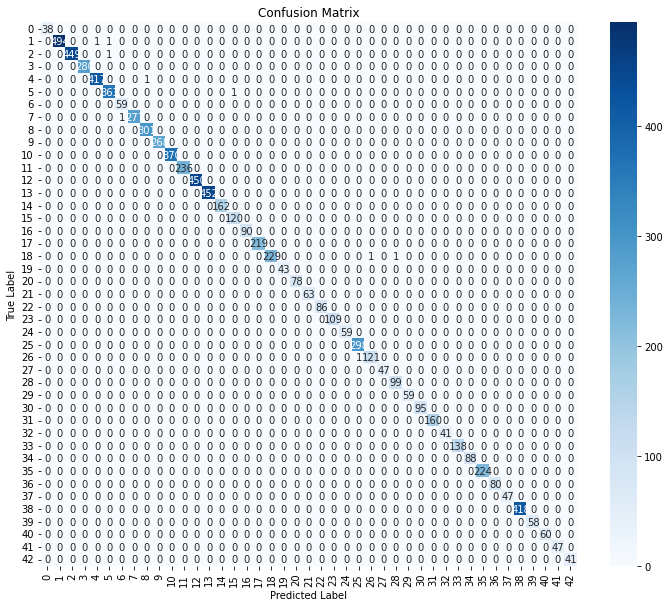

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       450
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       418
           5       0.99      1.00      1.00       364
           6       0.98      1.00      0.99        59
           7       1.00      1.00      1.00       278
           8       1.00      1.00      1.00       301
           9       1.00      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16       1.00      1.00      1.00        90
   

'\n Classification Report is  =>  Detailed Table Contains :\n \n 1: Precision (الدقه ) =>  يعني لو مسكت 20 غلطه كام واحد منهم فعلا غلط       ؟\n 2: Recall  (الاسترجاع) =>  يعني لو كان فيه  20 غلطه انا عرفت امسك واحد منهم ؟  \n 3: f1-score           =>  Precision And  Recall ده بقي عامل زي متوسط زكي بين \n 4: support            =>                 عدد الصورالفعلي في التيست في كل كلاس\n \n'

In [10]:
 #---------------------------------------------  Plotting  Confusion Matrix & Recall & F1-Score -----------------------------------#
            # -------------------------------------- الاداء الفعلي لكل كلاس من  المودل-------------------------------# 


# Step 1: توقّع الموديل على بيانات الاختبار

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # نحول الـ predictions لأرقام الفئات


# تحويل y_test من one-hot إلى أرقام
y_test_classes = np.argmax(y_test, axis=1)


# Step 2: Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# عرض Confusion Matrix  عشان يعرفك المودل اتلغبط في انهي كلاس بشكل جراف   < ==   بشكل رسومي    
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 3: Accuracy, Recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test_classes, y_pred_classes))   
'''
  Classification Report is  =>  Detailed Table Contains :
  
  1: Precision (الدقه ) =>  يعني لو مسكت 20 غلطه كام واحد منهم فعلا غلط       ؟
  2: Recall  (الاسترجاع) =>  يعني لو كان فيه  20 غلطه انا عرفت امسك واحد منهم ؟  
  3: f1-score           =>  Precision And  Recall ده بقي عامل زي متوسط زكي بين 
  4: support            =>                 عدد الصورالفعلي في التيست في كل كلاس
  
'''





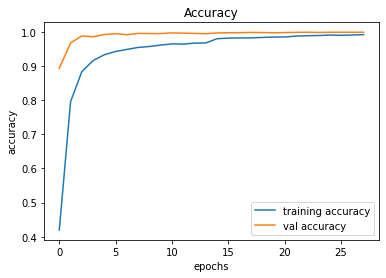

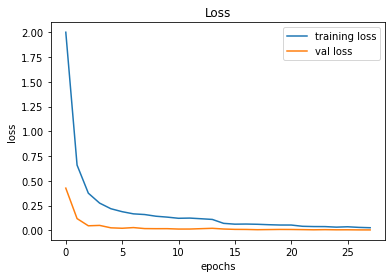

In [11]:
 #------------------------------------------------------ Plotting  Accuracy & Loss --------------------------------------------------------#
            # --------------------------------------الاداء العام للمودل ببساطه خسر قد اي ودقته كام -------------------------# 

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show() 


In [12]:
# Set the path to the test dataset CSV file
test_csv_path = 'Dataset/Test.csv'

# Read the test dataset CSV to get labels and image paths
y_test = pd.read_csv(test_csv_path)
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Process images and prepare data for evaluation
with tf.device('/GPU:0'):  # Use GPU if available
    for img in imgs:
        try:
            # Construct full image path
            image_path = 'Dataset/' + img
            
            # Open and resize image
            image = Image.open(image_path)
            image = image.resize([30, 30])
            data.append(np.array(image))
        except Exception as e:
            print(f"Ignoring non-image file: {img}")

# Convert list of images to numpy array
X_test = np.array(data)

X_test = X_test / 255.0  # <<< Normalize test images

# Make predictions using the model
with tf.device('/GPU:0'):  # Use GPU if available
    pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy score
test_accuracy = accuracy_score(labels, pred)

# Print the final accuracy result
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9820269200316706


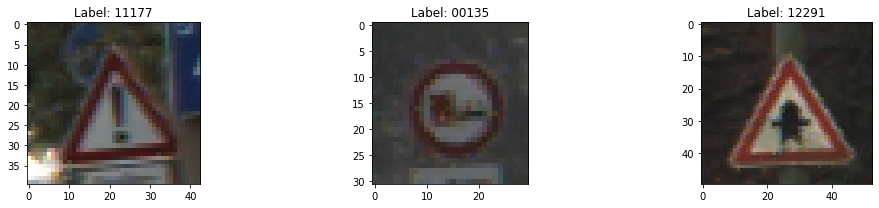

In [13]:
# Path to your dataset directory
dataset_dir = 'Dataset/Test'

# Load a few images and their labels
num_images_to_display = 3

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate over the first few images in the dataset
for i, img_filename in enumerate(os.listdir(dataset_dir)[:num_images_to_display]):
    img_path = os.path.join(dataset_dir, img_filename)
    
    # Load the image using PIL
    img = Image.open(img_path)
    
    # Display the image
    axes[i].imshow(img)
    axes[i].set_title(f'Label: {img_filename.split(".")[0]}')  # Assuming filename is label
    
plt.tight_layout()
plt.show()


In [14]:
          #--------------------------------------------Saving the Model-----------------------------------------------------# 


In [18]:
model.save('trained_model/traffic_classifier_v4.h5')


In [21]:
model =load_model('./trained_model/traffic_classifier_v4.h5')

print(model)